Make histograms of survey observation altitude for all projects and for each one separately.

In [1]:
import sys, os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as mb
from lsst.sims.utils import Site
from lsst.sims.utils import calcLmstLast

In [3]:
o = db.OpsimDatabase(os.path.expanduser('~/Data/db/astro-lsst-01_2013.db'))

In [4]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = '' 

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationId', 'altitude'].
Found 2364554 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [41]:
def get_altitudes(bundle):
    alt_size = np.sum(np.array([len(i) if i is not None else 0 for i in bundle.metricValues.data]))
    altitude = np.zeros(alt_size) # return value
    bsize1 = len(bundle_altitude.metricValues.data)
    start_index = 0

    for i in range(bsize1):
        if bundle_altitude.metricValues.data[i] is None:
            continue
        bsize2 = len(bundle_altitude.metricValues.data[i]['altitude'])
        altitude[start_index:start_index+bsize2] += bundle_altitude.metricValues.data[i]['altitude']
        start_index+=bsize2    
    return altitude

In [6]:
altitude = get_altitudes(bundle_altitude)

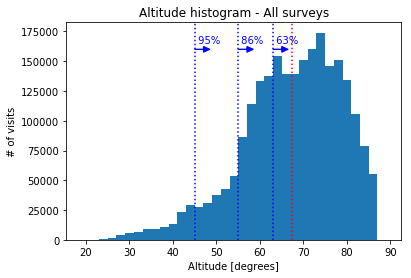

In [7]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = 160e3
text_pos = 165e3

for i in range(len(tier_levels)):
    plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
    plt.arrow(bins[ntier_n[i]], arrow_pos, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')    
    plt.annotate('%3.0f%%' % tier_levels[i],
                xy=(bins[ntier_n[i]], text_pos), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')


plt.title('Altitude histogram - All surveys')
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_all.png'))

In [8]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = 'proposalId = 3' # WFD 

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 3 for columns ['observationId', 'altitude']
Found 2037211 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [9]:
altitude = get_altitudes(bundle_altitude)

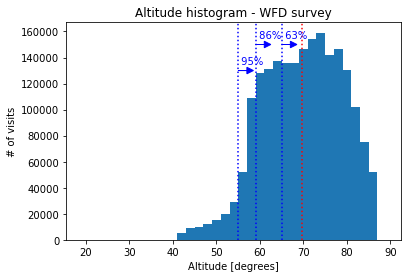

In [10]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [150e3, 150e3, 130e3]
text_pos =  [155e3, 155e3, 135e3]

for i in range(len(tier_levels)):
    plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
    plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')    
    plt.annotate('%3.0f%%' % tier_levels[i],
                xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')


plt.title('Altitude histogram - WFD survey')
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_WFD.png'))

In [11]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = 'proposalId = 5' # DeepDrilling

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 5 for columns ['observationId', 'altitude']
Found 116804 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [12]:
altitude = get_altitudes(bundle_altitude)

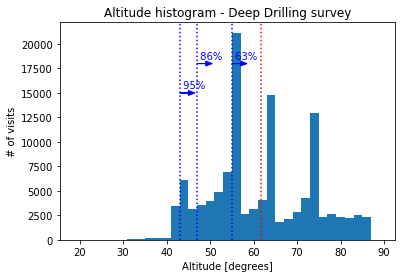

In [13]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [18e3, 18e3, 15e3]
text_pos =  [18.5e3, 18.5e3, 15.5e3]

for i in range(len(tier_levels)):
    plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
    plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=5e2, head_length=1.5, fc='b', ec='b')    
    plt.annotate('%3.0f%%' % tier_levels[i],
                xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')

plt.title('Altitude histogram - Deep Drilling survey')
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_dd.png'))

In [14]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = 'proposalId = 4' # Galactic plane

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 4 for columns ['observationId', 'altitude']
Found 37818 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [15]:
altitude = get_altitudes(bundle_altitude)

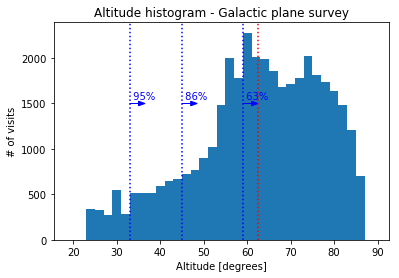

In [16]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [1.5e3, 1.5e3, 1.5e3]
text_pos =  [1.55e3, 1.55e3, 1.55e3]

for i in range(len(tier_levels)):
    plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
    plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=5e1, head_length=1.5, fc='b', ec='b')    
    plt.annotate('%3.0f%%' % tier_levels[i],
                xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')

plt.title('Altitude histogram - Galactic plane survey')
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_gp.png'))

In [17]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = 'proposalId = 1' # NorthEclipticSpur

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 1 for columns ['observationId', 'altitude']
Found 127187 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [18]:
altitude = get_altitudes(bundle_altitude)

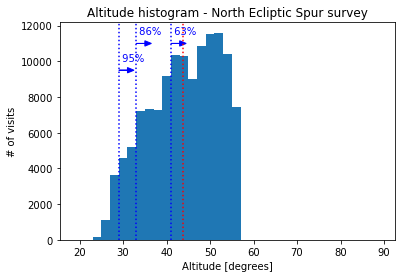

In [19]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [11e3, 11e3, 9.5e3]
text_pos =  [11.5e3, 11.5e3, 10e3]

for i in range(len(tier_levels)):
    plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
    plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=3e2, head_length=1.5, fc='b', ec='b')    
    plt.annotate('%3.0f%%' % tier_levels[i],
                xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')

plt.title('Altitude histogram - North Ecliptic Spur survey')
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_ngs.png'))

In [20]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = 'proposalId = 2' # SouthCelestialPole

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint proposalId = 2 for columns ['observationId', 'altitude']
Found 46133 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [21]:
altitude = get_altitudes(bundle_altitude)

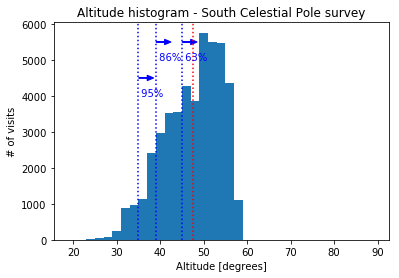

In [22]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [5.5e3, 5.5e3, 4.5e3]
text_pos =  [5.0e3, 5.0e3, 4.0e3]

for i in range(len(tier_levels)):
    plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
    plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=1.5e2, head_length=1.5, fc='b', ec='b')    
    plt.annotate('%3.0f%%' % tier_levels[i],
                xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')

plt.title('Altitude histogram - South Celestial Pole survey')
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_scp.png'))

In [58]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
sql = '(proposalId = 5) and (fieldId = %i)' # DeepDrilling
dd_fields = [290, 744, 1427, 2412, 2786]
dd_index = 4

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql%dd_fields[dd_index])
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint (proposalId = 5) and (fieldId = 2786) for columns ['observationId', 'altitude']
Found 16698 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [59]:
# print(bundle_altitude.metricValues)
altitude = get_altitudes(bundle_altitude)

(0.0, 9656.8500000000004)

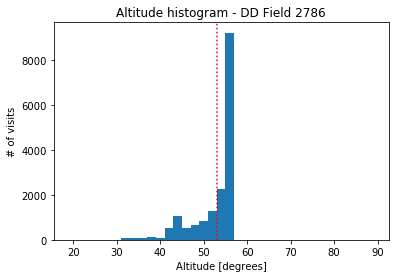

In [60]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [5.5e3, 5.5e3, 4.5e3]
text_pos =  [5.0e3, 5.0e3, 4.0e3]

# for i in range(len(tier_levels)):
#     plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
#     plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=1.5e2, head_length=1.5, fc='b', ec='b')    
#     plt.annotate('%3.0f%%' % tier_levels[i],
#                 xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')

plt.title('Altitude histogram - DD Field %i' % dd_fields[dd_index])
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
# plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_scp.png'))

Let's try making some cuts on Declination... 

In [71]:
altitude_metric = metrics.PassMetric('altitude', metricName='Altitude')
slicer_observation = slicers.OneDSlicer(sliceColName='observationId') 
min_dec, max_dec = -63., -58.,
sql = '(proposalId = 3) and (fieldDec > %.1f and fieldDec < %.1f)' % (min_dec, max_dec) # WFD 

bundle_altitude = mb.MetricBundle(altitude_metric, slicer_observation, sql)
bg = mb.MetricBundleGroup({0:bundle_altitude}, o)
bg.runAll()

Querying database SummaryAllProps with constraint (proposalId = 3) and (fieldDec > -63.0 and fieldDec < -58.0) for columns ['observationId', 'altitude']
Found 70867 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [72]:
altitude = get_altitudes(bundle_altitude)

(0.0, 30899.400000000001)

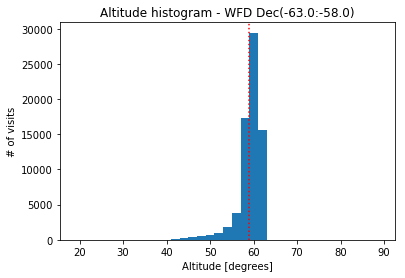

In [73]:
mean_altitude = np.mean(altitude)

bsize = 2.
bins = np.arange(20.,90.+bsize,bsize)-bsize/2.

# Compute and plot the histogram
hist_res = plt.hist(altitude, bins=bins)

total = np.sum(hist_res[0])
tier_levels = [63., 86., 95.]
tier_n = np.zeros(len(tier_levels))
ntier_n = np.zeros_like(tier_n,dtype=np.int)+len(hist_res[0])-1

for i in range(len(tier_levels)):
    for j in range(len(hist_res[0])):
        if (tier_n[i]+hist_res[0][ntier_n[i]])*1.0 > total*tier_levels[i]/100.:
            break
        tier_n[i] += hist_res[0][ntier_n[i]]
        ntier_n[i] -= 1 

ylim = plt.ylim()

plt.plot([mean_altitude,mean_altitude],ylim,'r:')
arrow_pos = [5.5e3, 5.5e3, 4.5e3]
text_pos =  [5.0e3, 5.0e3, 4.0e3]

# for i in range(len(tier_levels)):
#     plt.plot([bins[ntier_n[i]],bins[ntier_n[i]]],ylim,'b:')
#     plt.arrow(bins[ntier_n[i]], arrow_pos[i], 2, 0, head_width=1.5e2, head_length=1.5, fc='b', ec='b')    
#     plt.annotate('%3.0f%%' % tier_levels[i],
#                 xy=(bins[ntier_n[i]], text_pos[i]), xycoords='data',color='b')

    
# print(bins[ntier_1])
# plt.arrow(bins[ntier_1], 150e3, 2, 0, head_width=5e3, head_length=1.5, fc='b', ec='b')
# # plt.plot([mean_altitude-std_altitude,mean_altitude-std_altitude],ylim,'r:')

plt.title('Altitude histogram - WFD Dec(%.1f:%.1f)' % (min_dec, max_dec))
plt.ylabel('# of visits')
plt.xlabel('Altitude [degrees]')
plt.ylim(ylim)
# plt.savefig(os.path.expanduser('~/Data/db/astro-lsst-01_2013_scp.png'))